In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [29]:
def get_pos_vel(itime,pos_true):
    "Return measured position, true velocity and true position"
    w=np.random.normal(0,np.sqrt(10)) # w :system noise
    v=np.random.normal(0,np.sqrt(10)) # v: measurement noise
    
    vel_true=20 + w
    if itime==0:
        pos_true=pos_true
    else:
        pos_true=pos_true+vel_true*dt
    z_pos_meas=pos_true+v #z_pos_meas : mesaured position (observavle)
    return z_pos_meas,vel_true,pos_true

In [30]:
def kalman_filter(z_meas,x_esti,P):
    "Kalman Filter Algorithm"
    #(1) Prediction. 
    x_pred=A@x_esti
    P_pred=A@P@A.T +Q
    
    #(2) Kalman Filter
    K = P_pred@H.T@inv(H@P_pred@H.T +R)
    
    #(3) Estimation 
    x_esti = x_pred+ K@(z_meas - H@x_pred)
    
    #(4) Error Convariance
    P = P_pred - K@H@P_pred
    
    return x_esti, P

In [31]:
# Input parameters.

time_end=4
dt=0.1

In [32]:
# Initialization for system model 
# matrix : A,H,Q,R,P_0
# vector : x_0
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0],
              [0, 3]])
R=np.array([[10]])

x_0=np.array([0,20]) # position and velocity
P_0 = 5*np.eye(2)

In [33]:
time = np.arange(0,time_end,dt)
n_samples = len(time)

pos_meas_save = np.zeros(n_samples)
vel_true_save = np.zeros(n_samples)
pos_esti_save = np.zeros(n_samples)
vel_esti_save = np.zeros(n_samples)

In [34]:
pos_true=0
x_esti, P =None,None
for i in range(n_samples):
    z_meas,vel_true,pos_true = get_pos_vel(i,pos_true)
    if i == 0:
        x_esti, P=x_0,P_0
    else: 
        x_esti, P=kalman_filter(z_meas,x_esti,P)
        
    
    pos_meas_save[i]=z_meas
    vel_true_save[i]=vel_true
    pos_esti_save[i]=x_esti[0]
    vel_esti_save[i]=x_esti[1]

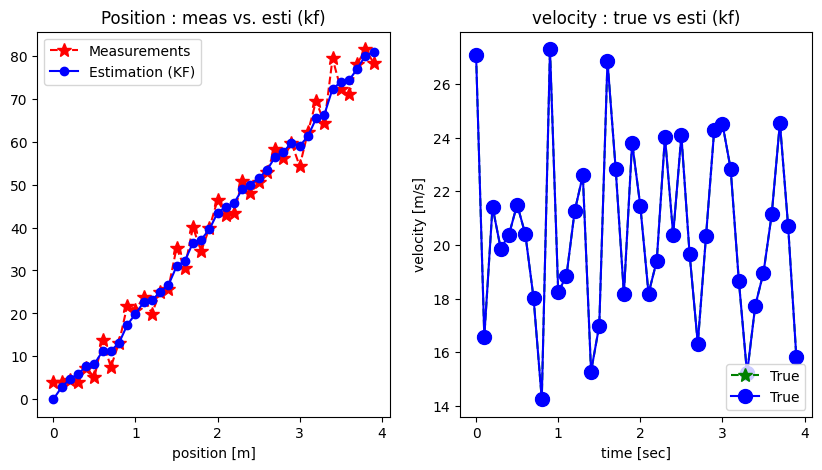

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(time,pos_meas_save,"r*--",label="Measurements",markersize=10)
plt.plot(time,pos_esti_save,"bo-",label="Estimation (KF)")
plt.legend(loc="upper left")
plt.title("Position : meas vs. esti (kf)")
plt.xlabel("time[sec]")
plt.xlabel("position [m]")

plt.subplot(1,2,2)
plt.plot(time,vel_true_save,"g*--",label=True,markersize=10)
plt.plot(time,vel_true_save,"bo-",label=True,markersize=10)
plt.legend(loc="lower right")
plt.title("velocity : true vs esti (kf)")
plt.xlabel("time [sec]")
plt.ylabel("velocity [m/s]")

plt.savefig("png/pos2vel_kf.png")